<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


P(safety)=60%

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No I do not agree, because theres still two events with trolls, and the only event without trolls is event 3. There is still a 20% chance you will end up in event 1, and encounter 1 troll, and event 2 also has 1 troll  and that event happens another 20% of the time.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured
 
Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?
\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

#Event 1 and Event 2, because there are still trolls in each event,

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [143]:
println("P(H2|T)=(P(T|H2)*P(H)/(P(T|H2)*P(H)+(P(T|H1)P(H)+P(T|H3)*P(H)))")
E2=(1/5)*(1/5)/((1/5)*(1/5)+(1/5)*(2/5)+0*(3/5))#ask 


P(H2|T)=(P(T|H2)*P(H)/(P(T|H2)*P(H)+(P(T|H1)P(H)+P(T|H3)*P(H)))


0.3333333333333333

Probability of the other event given a troll captured: 

In [218]:
println("P(H1|T)=(P(T|H1)*P(H1)/(P(H1|T)P(H1)+P(H2|T)P(H2)+P(H3|T)P(H3))")
E1=(2/5*1/5)/((2/5)*(1/5)+(1/5)*(1/5)+(3/5)*0)



P(H1|T)=(P(T|H1)*P(H1)/(P(H1|T)P(H1)+P(H2|T)P(H2)+P(H3|T)P(H3))


0.6666666666666665

### 1.5

#### What is the chance of the knight crossing safely?

In [220]:
E2

0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [13]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [17]:
import Distributions as di
import Plots
import Polynomials
import Random
import Polynomials: Polynomials, fit, coeffs
import Statistics

In [170]:
using Polynomials
using Distributions
using Statistics


### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [19]:
x=-10:10
collect(x)



21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [21]:
y_true=Polynomial([-2,3,1])

Polynomial(-2 + 3*x + x^2)

In [22]:
#just for reference
y_truee=y_true.(x)

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [23]:
using Plots

In [27]:
dataerr=10.0
noise=di.Normal(0,dataerr)
y_observed=y_truee+rand(noise,length(x))

21-element Vector{Float64}:
  68.9730986499221
  59.243002623102754
  39.8925775473615
   5.372555893523092
  17.805330874458402
   9.00964146892627
  -3.703206205034192
  21.43922399769945
 -10.360992661072315
 -13.760664658382519
 -16.058736346067008
   6.563530638011397
   8.273361521295492
   9.301649815306977
  16.558523443900103
  35.5750397737896
  73.05400583639528
  76.80068470538966
  75.46425326414881
 104.28731232358652
 127.80876852086364

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

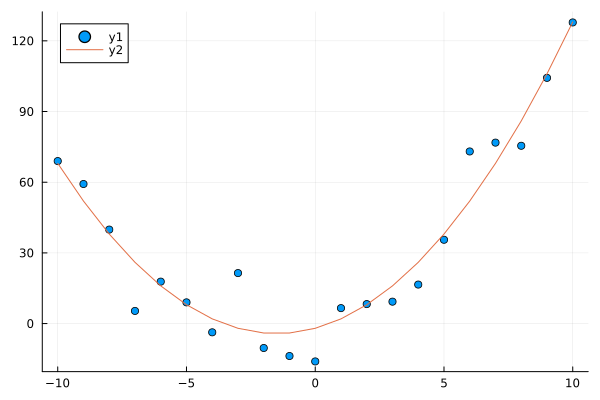

In [217]:

scatter(x,y_observed)
plot!(x,y_truee)

In [160]:
line_fit=fit(x,y_observed,2)

Polynomial(-3.86819710310073 + 3.0452882265412478*x + 1.0295728573925198*x^2)

In [162]:
fit_coeff=coeffs(line_fit)

3-element Vector{Float64}:
 -3.86819710310073
  3.0452882265412478
  1.0295728573925198

In [164]:
y_fitted=fit_coeff[1] .+ (fit_coeff[2].*(x)) .+ (fit_coeff[3] .*(x.^2))

21-element Vector{Float64}:
  68.63620637073878
  52.119610306822146
  37.662159957690555
  25.263855323344007
  14.924696403782498
   6.644683199006028
   0.42381570901459753
  -3.7379060661917958
  -5.8404821266131455
  -5.883912472249456
  -3.86819710310073
   0.20666398083303528
   6.340670779551847
  14.533823293055692
  24.786121521344576
  37.09756546441851
  51.468155122277466
  67.89789049492147
  86.38677158235052
 106.9347983845646
 129.54197090156373

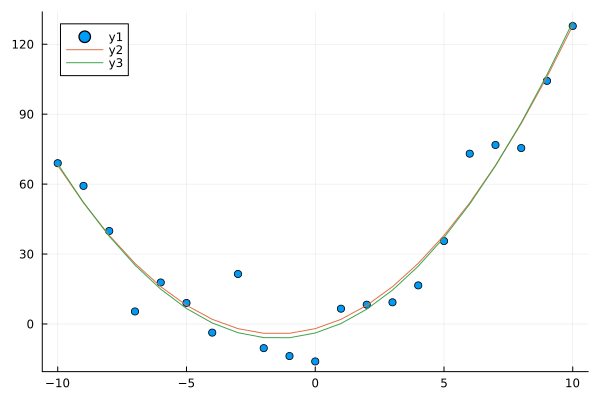

In [165]:
scatter(x,y_observed)
plot!(x,y_truee)
plot!(x,y_fitted)

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [171]:
dataerr50=50.0
noise1=di.Normal(0,dataerr50)



Normal{Float64}(μ=0.0, σ=50.0)

In [172]:
x1=-10:10
collect(x1)
Polynomial([-2,3,1])
y_t=Polynomial([-2,3,1]).(x1)
y_ob=y_t+rand(noise1,length(x1))

21-element Vector{Float64}:
  60.69209363678754
 143.20814972595124
 -89.86677695911517
  71.60938403702949
  37.93734267318641
  23.014806920158733
  70.40224370226292
  42.127388610408815
   8.427653683603305
 -16.241189018054246
  43.23338616717954
   5.691312942041832
  -1.15873777379203
  13.261525222830436
  41.8746484757355
   0.21415694798777452
 162.74311898324618
  77.1691714373714
  31.934301284505274
 129.80157103959084
 163.1175862701153

In [173]:
line_fit1=fit(x1,y_ob,2)
fit_coeff1=coeffs(line_fit1)
y_fitted1=fit_coeff1[1] .+ (fit_coeff1[2].*(x)) .+ (fit_coeff1[3] .*(x.^2))

21-element Vector{Float64}:
  76.75994173848994
  62.178079339452886
  49.45292781658011
  38.58448716987165
  29.572757399327486
  22.417738504947643
  17.1194304867321
  13.677833344680863
  12.092947078793935
  12.364771689071313
  14.493307175512998
  18.478553538118984
  24.320510776889286
  32.01917889182389
  41.574557882922804
  52.986647750186016
  66.25544849361354
  81.38096011320539
  98.36318260896152
 117.20211598088196
 137.89776022896672

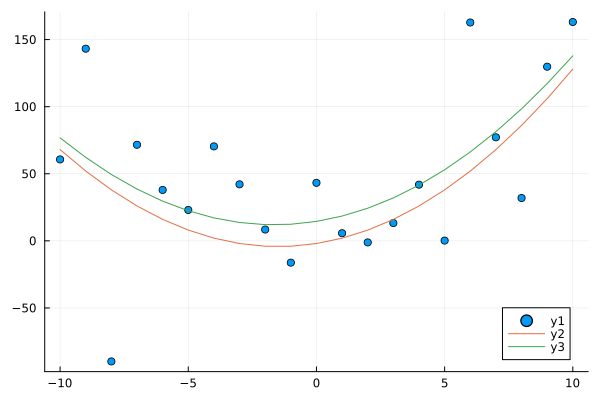

In [174]:
scatter(x,y_ob)
plot!(x,y_t)
plot!(x,y_fitted1)

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

the fit is further, because the standard deviation of the noise is larger.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


In [225]:
x_t=-10:10
collect(x_t)
#Polynomial([-2,3,1,0,1,2,3,4,5,6,7])
y_t2=Polynomial([1,2,3,4,5,6,7,8,9,10]).(x_t)

21-element Vector{Int64}:
 -9173553719
 -3521652245
 -1206302543
  -357507737
   -87614255
   -16547309
    -2139095
     -151313
       -3527
          -5
           1
          55
        9217
      280483
     3378745
    23803711
   118513705
   462945547
  1512003793
  4303999495
 10987654321

In [179]:
err=10
noise_again=di.Normal(0,err)
y_ob1=y_t2+rand(noise_again,length(x_t))

21-element Vector{Float64}:
      6.4462810065775154e10
      2.2280552447662838e10
      6.787108894837484e9
      1.7610566954577909e9
      3.7020111607898134e8
      5.832251706868437e7
      6.039813899126437e6
 321093.0677940934
   5013.706052507929
     -2.9249731575616815
      7.335869998403549
     31.31591768391792
  12316.958620962838
 575751.9467809711
      9.320719428822732e6
      8.239754854411043e7
      4.9340409572379035e8
      2.251955579585675e9
      8.41462997772209e9
      2.696809832165222e10
      7.654321012297675e10

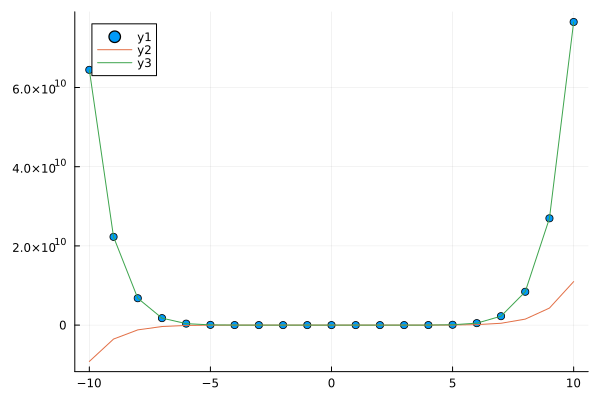

In [205]:
line_fit2=fit(x_t,y_ob1,10)
f=coeffs(line_fit2)
y_fitted2=f[1] .+ f[2].*(x_t) .+ f[3].*(x_t.^2) .+ f[4].*(x_t.^3) .+f[5].*(x_t.^4) .+f[6].*(x_t.^5).+f[7].*(x_t.^6) .+ f[8].*(x_t.^7) .+ f[9].*(x_t.^8) .+ f[10].*(x_t.^9) .+ f[11].*(x_t.^10)
scatter(x_t,y_ob1)
plot!(x,y_t2)
plot!(x,y_fitted2)

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


In [210]:
x_fit=-11:0.1:11
collect(x_fit)
y_t3=Polynomial([1,2,3,4,5,6,7,8,9,10]).(x_fit)

221-element Vector{Float64}:
 -2.1794641505e10
 -2.0060987285569813e10
 -1.8451025184958473e10
 -1.695696253634806e10
 -1.5571431368565237e10
 -1.4287468938078125e10
 -1.3098498981648935e10
 -1.1998313669443962e10
 -1.0981056238784079e10
 -1.0041204289096249e10
 -9.173553719e9
 -8.373203286833476e9
 -7.635539776289666e9
  ⋮
  1.0047421108556347e10
  1.0987654321e10
  1.2005312315796207e10
  1.3105918267913849e10
  1.4295329737514078e10
  1.5579755375453375e10
  1.6965772289992188e10
  1.846034409414834e10
  2.0070839653512398e10
  2.180505255472308e10
  2.3671221315184937e10
  2.5678050355e10

In [211]:
error=10
noise_3=di.Normal(0,error)
y_ob3=y_t3+rand(noise_3,length(x_fit))

221-element Vector{Float64}:
 -2.1794641508124035e10
 -2.0060987296284634e10
 -1.8451025203164062e10
 -1.6956962538661394e10
 -1.5571431360436495e10
 -1.4287468939912792e10
 -1.3098498984891544e10
 -1.1998313676471544e10
 -1.0981056241232609e10
 -1.0041204286643839e10
 -9.173553712268959e9
 -8.373203281285177e9
 -7.63553977526666e9
  ⋮
  1.0047421128398224e10
  1.0987654323053802e10
  1.2005312321790462e10
  1.3105918267337896e10
  1.429532973508916e10
  1.557975535772947e10
  1.6965772279661116e10
  1.846034409887397e10
  2.007083966944472e10
  2.1805052547063934e10
  2.3671221307691353e10
  2.56780503659625e10

In [226]:
line_fit3=fit(x_fit,y_ob3,10)
y_fitted3=line_fit3.(x_fit)
#f3=coeffs(line_fit3)
#y_fitted3=f3[1] .+ f3[2].*(x_fit) .+ f3[3].*(x_fit.^2) .+ f[4].*(x_fit.^3) .+f3[5].*(x_fit.^4) .+f3[6].*(x_fit.^5).+f3[7].*(x_fit.^6) .+ f3[8].*(x_fit.^7) .+ f3[9].*(x_fit.^8) .+ f3[10].*(x_fit.^9) .+ f3[11].*(x_fit.^10)

221-element Vector{Float64}:
 -2.179464151397041e10
 -2.0060987293066673e10
 -1.8451025191101013e10
 -1.6956962541253906e10
 -1.5571431372349619e10
 -1.428746894085321e10
 -1.3098498983523237e10
 -1.1998313670521862e10
 -1.0981056239165407e10
 -1.0041204288875992e10
 -9.173553718268013e9
 -8.373203285674309e9
 -7.635539774782426e9
  ⋮
  1.0047421104874277e10
  1.0987654317443537e10
  1.2005312312438774e10
  1.310591826484233e10
  1.4295329734830442e10
  1.5579755373276495e10
  1.6965772288459772e10
  1.8460344093419052e10
  2.007083965376817e10
  2.1805052556171555e10
  2.3671221318062187e10
  2.567805035957339e10

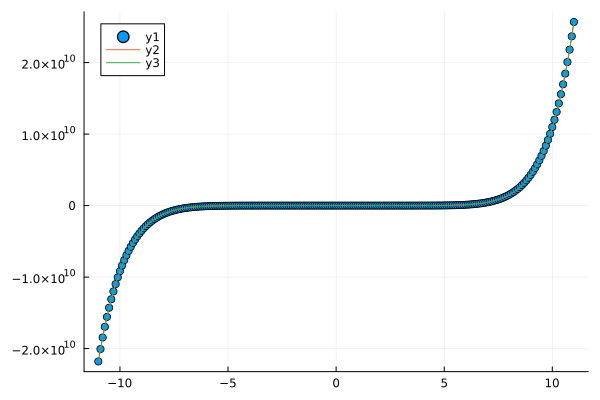

In [227]:
scatter(x_fit,y_ob3)
plot!(x_fit,y_t3)
plot!(x_fit,y_fitted3)

3. What do you observe in the plot? What is this phenomenon called?

y observed fits on the fitted polynomial. The polynomial is more complex, and this can lead to "over-fitting."